<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [ ]:
import pandas as pd
df = pd.read_csv('/content/exportgbiall01_05_6.csv', sep = ";")
#df

In [1]:
pip install pm4py

In [3]:
import pandas as pd
import pm4py
df = pd.read_csv('/content/exportgbiall01_05_all2.csv',sep=";",names = ['Timestamp','org:resource','case:concept:name', 'transaction', 'concept:name','dialog_steps'],usecols = [1,2,3,4,5,6])
print(df)
logcost = pm4py.format_dataframe(df, case_id = 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'Timestamp')
logcost['time:timestamp'] = pd.to_datetime(df.Timestamp)



               Timestamp org:resource  case:concept:name transaction  \
0    2025.03.11 10:04:01   GBIALL-001                  1        FB02   
1    2025.03.11 10:13:02   GBIALL-001                  1        FB03   
2    2025.03.11 10:20:17   GBIALL-001                  1        FB08   
3    2025.03.11 10:23:29   GBIALL-001                  1        FB03   
4    2025.03.11 10:24:06   GBIALL-001                  1        FB08   
..                   ...          ...                ...         ...   
260  2025.03.11 11:08:12   GBIALL-027                 27        FK01   
261  2025.03.11 11:09:34   GBIALL-027                 27        FK02   
262  2025.03.11 11:10:58   GBIALL-027                 27        FB60   
263  2025.03.11 11:12:20   GBIALL-027                 27       FK10N   
264  2025.03.11 11:13:54   GBIALL-027                 27        F-53   

                   concept:name  dialog_steps  
0               Change Document             3  
1              Display Document        

filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [ ]:

for variant, subdf in pm4py.split_by_process_variant(log):
    #print(variant)  # The definition of that particular variant
    print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
transition_system = pm4py.discover_transition_system(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



In [5]:

case_duration = pm4py.get_all_case_durations(logcost)
print(case_duration)

[-2791.0, -2178.0, -1553.0, -1296.0, -913.0, -900.0, -622.0, -522.0, -283.0, 0.0, 54.0, 227.0, 419.0, 879.0, 1094.0, 1106.0, 1231.0, 1280.0, 1307.0, 1520.0, 4393.0]


In [6]:
pm4py.get_start_activities(logcost)

{'Change Document': 7, 'Display Document': 9, 'Create Vendor (Accounting)': 5}

In [7]:
pm4py.get_end_activities(logcost)

{'Vendor Line Items': 6,
 'Post Outgoing Payments': 6,
 'Enter Incoming Credit Memos': 2,
 'Enter Incoming Invoices': 3,
 'Display Document': 2,
 'Reverse Document': 1,
 'Create Vendor (Accounting)': 1}

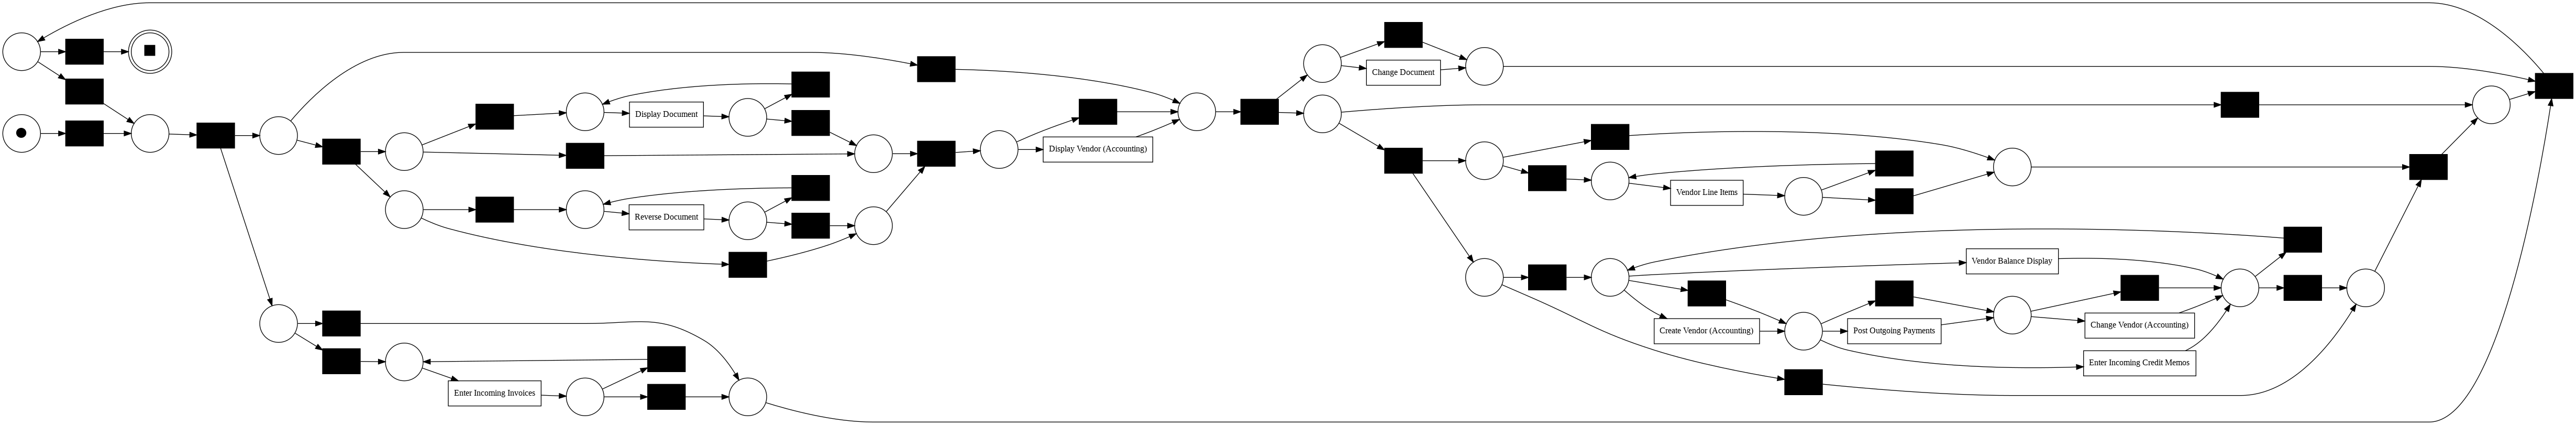

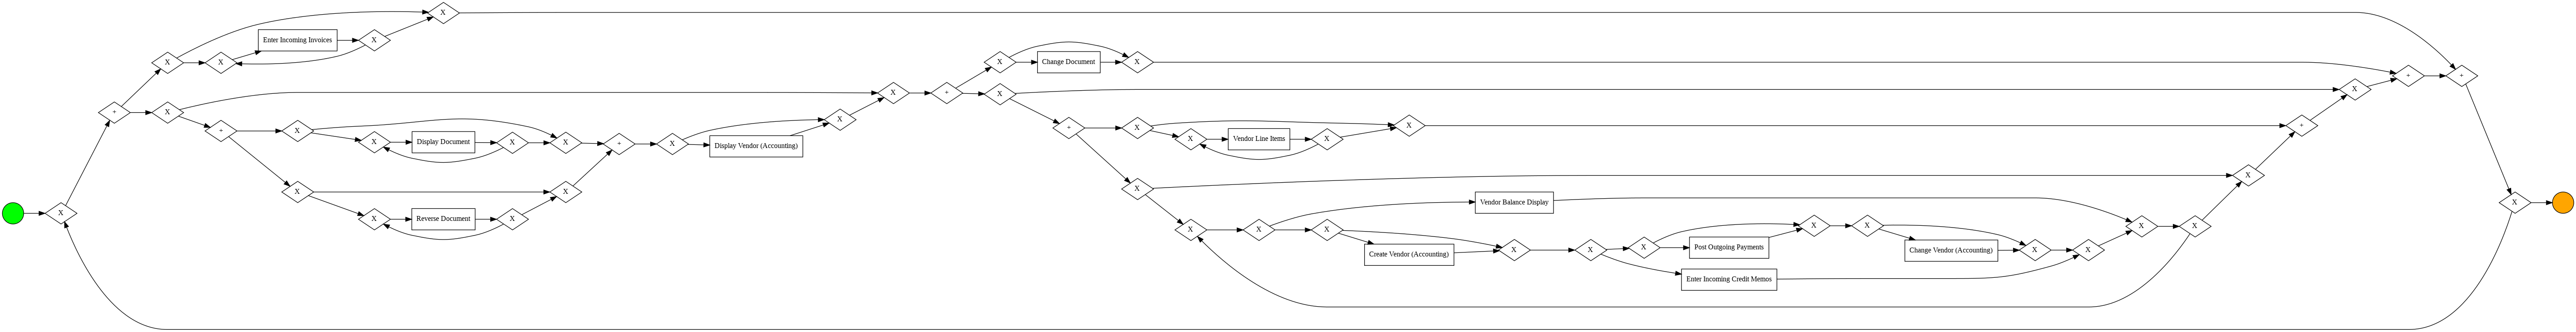

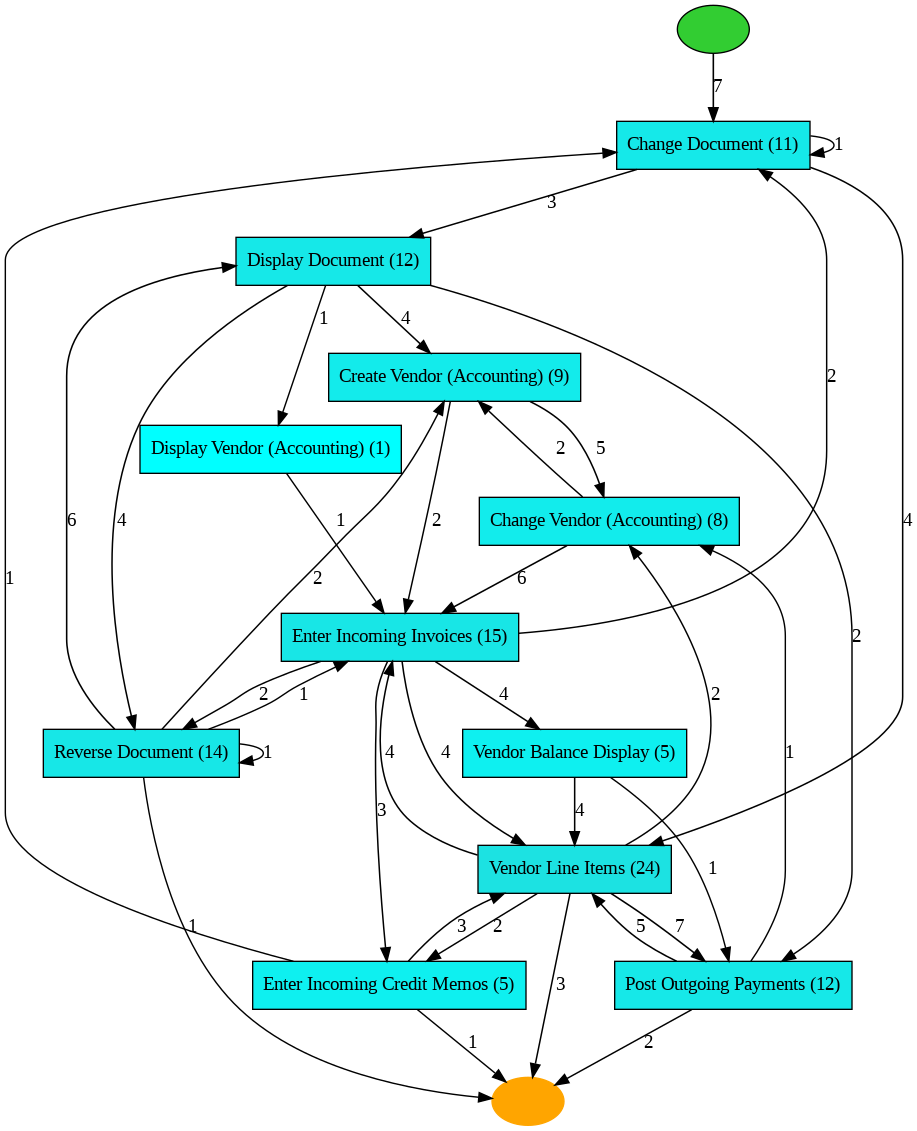

In [40]:
filt_log2 = pm4py.filter_start_activities(logcost, {'Change Document'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log2)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)

In [ ]:
filtered_log = pm4py.filter_trace_attribute_values(
    logcost,
    'User',
    ['GBIALL-001', 'GBIALL-002'],
    case_id_key='case:concept:name'
)
map = pm4py.discover_heuristics_net(filtered_log)
pm4py.view_heuristics_net(map)


In [ ]:
process_tree = pm4py.discover_process_tree_inductive(logcost)
pm4py.view_process_tree(process_tree)

# Feldolgozás

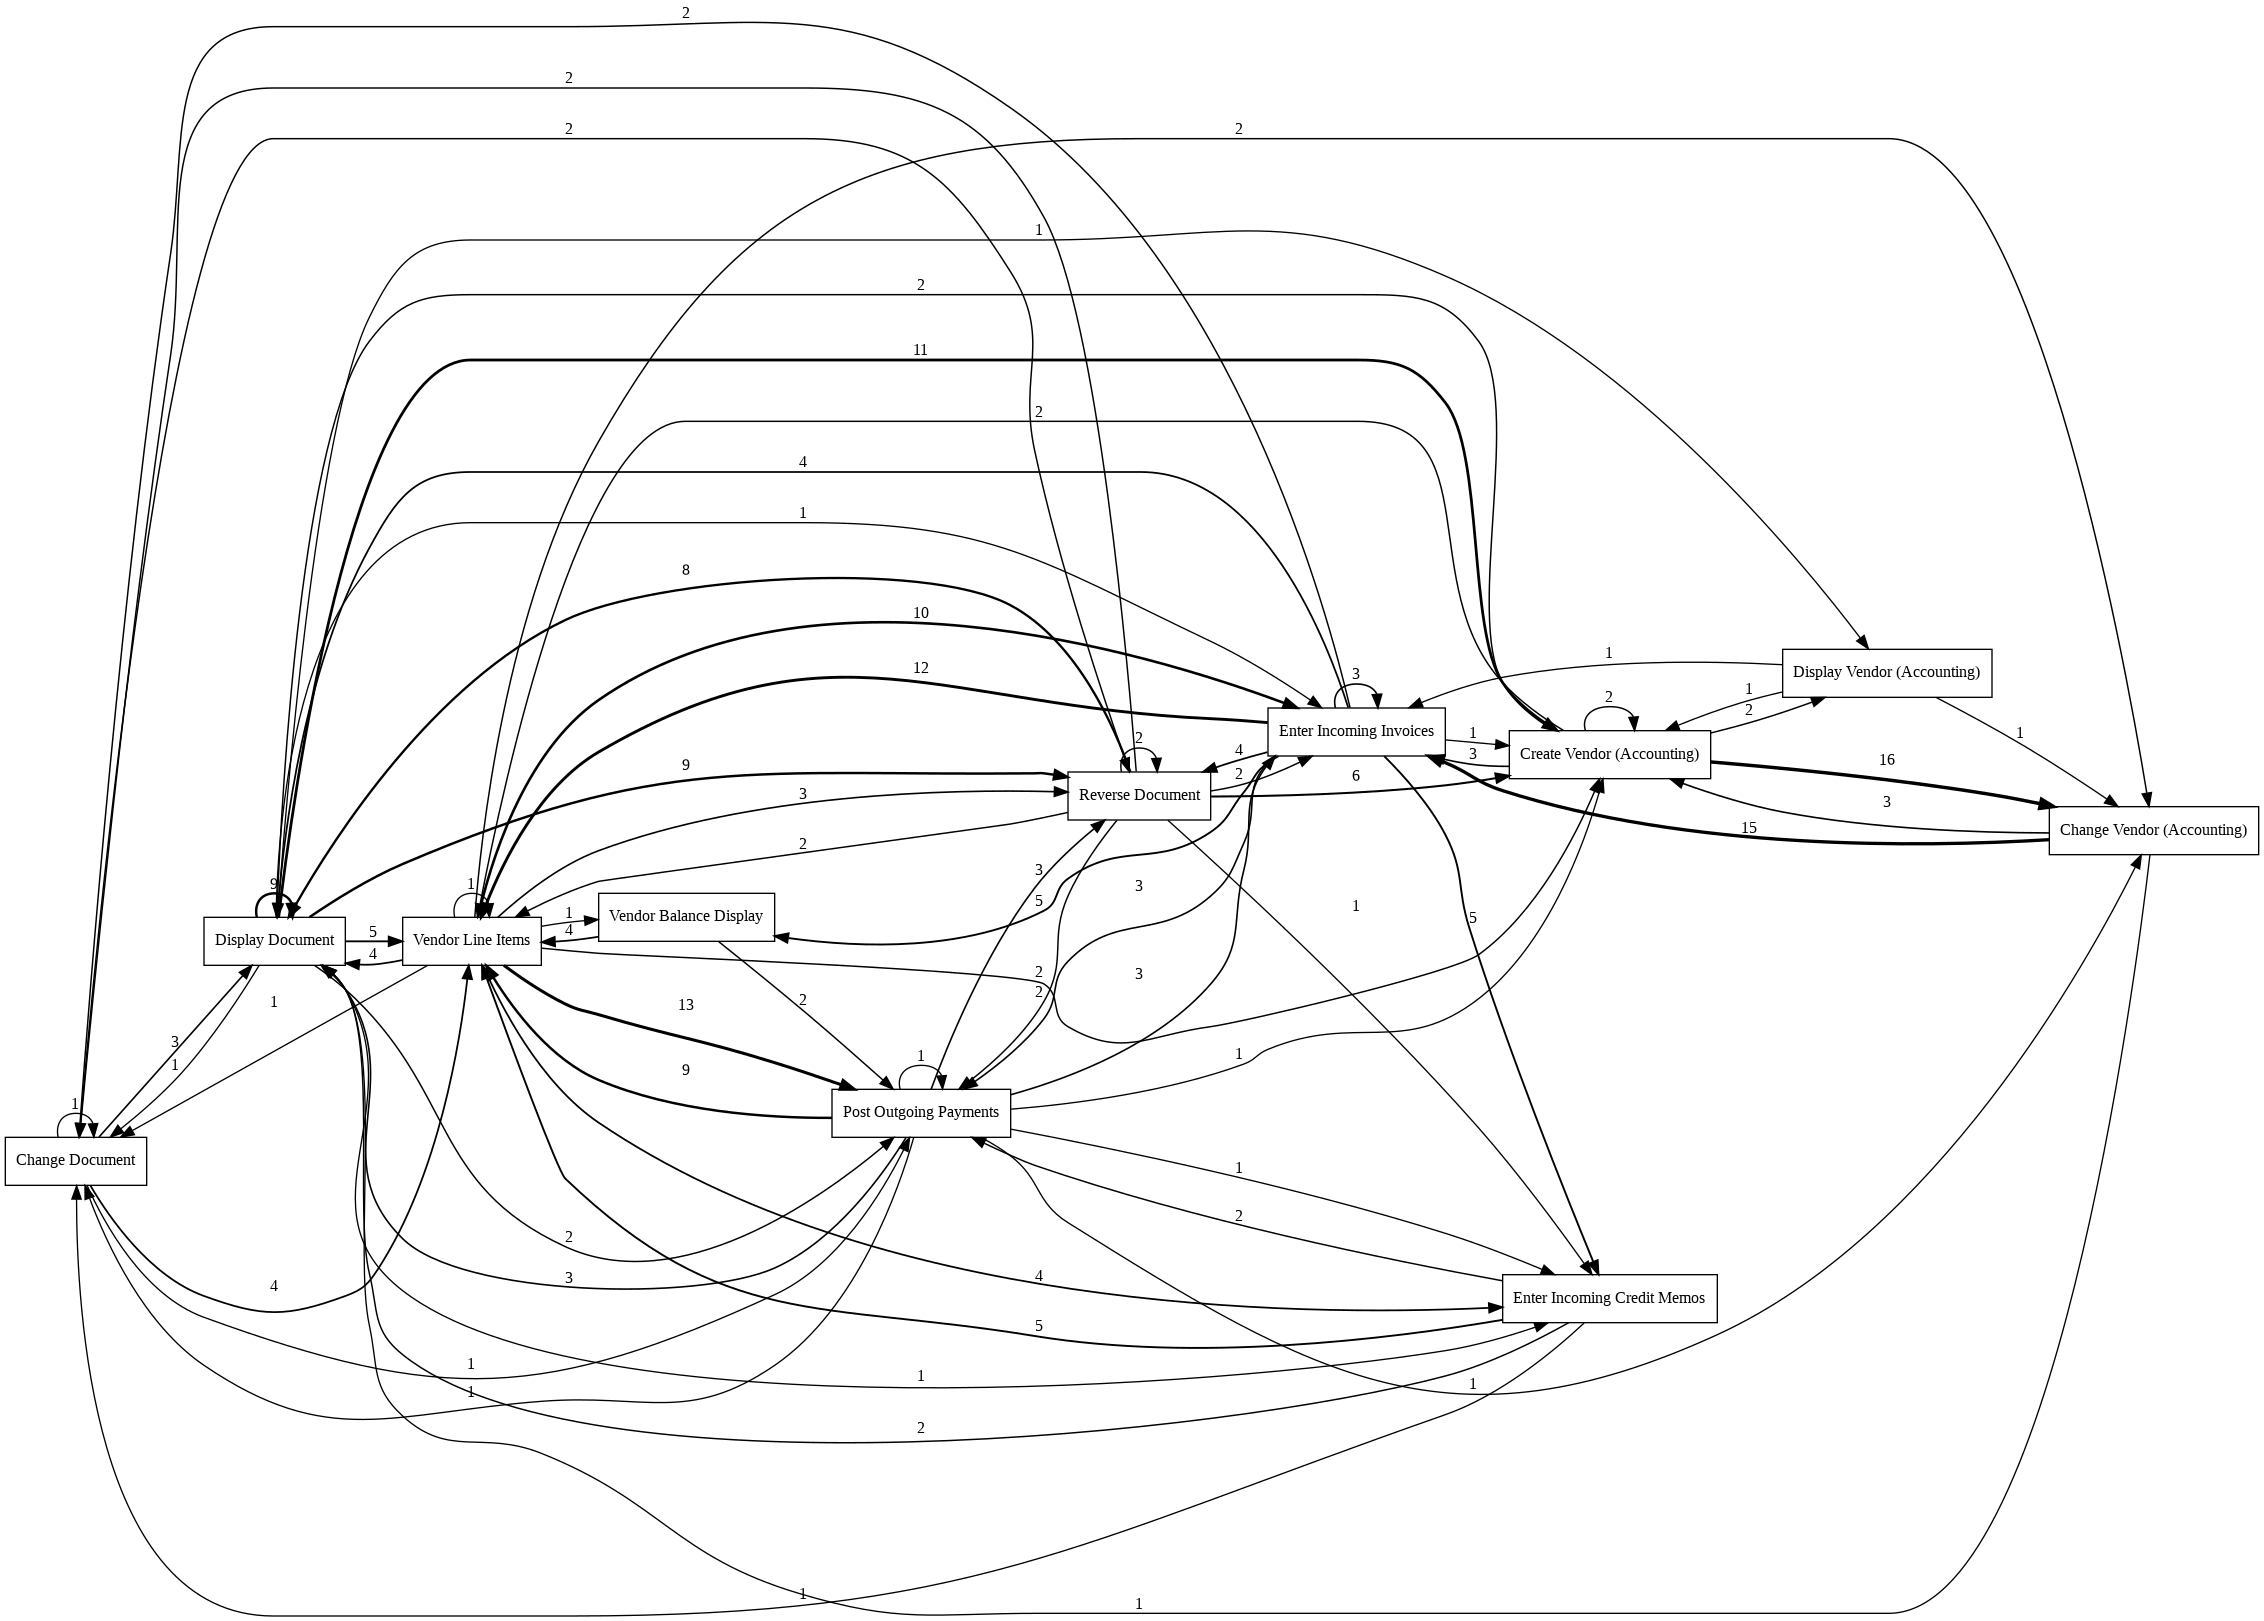

In [41]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.COST)
dfg_visualization.view(gviz)


In [52]:


dfg = pm4py.discover_dfg(logcost)
print(len(dfg))
for df2 in dfg:
  print(df2)
  print('\n')

3
{('Change Document', 'Change Document'): 1, ('Change Document', 'Display Document'): 3, ('Change Document', 'Post Outgoing Payments'): 1, ('Change Document', 'Reverse Document'): 2, ('Change Document', 'Vendor Line Items'): 4, ('Change Vendor (Accounting)', 'Create Vendor (Accounting)'): 3, ('Change Vendor (Accounting)', 'Display Document'): 1, ('Change Vendor (Accounting)', 'Enter Incoming Invoices'): 15, ('Create Vendor (Accounting)', 'Change Vendor (Accounting)'): 16, ('Create Vendor (Accounting)', 'Create Vendor (Accounting)'): 2, ('Create Vendor (Accounting)', 'Display Document'): 2, ('Create Vendor (Accounting)', 'Display Vendor (Accounting)'): 2, ('Create Vendor (Accounting)', 'Enter Incoming Invoices'): 3, ('Create Vendor (Accounting)', 'Vendor Line Items'): 2, ('Display Document', 'Change Document'): 1, ('Display Document', 'Create Vendor (Accounting)'): 11, ('Display Document', 'Display Document'): 9, ('Display Document', 'Display Vendor (Accounting)'): 1, ('Display Documen

In [11]:
for i in range(0, len(logcost)-1):
  print(logcost['concept:name'][i] + "      " + logcost['concept:name'][i+1])

Change Document      Display Document
Display Document      Reverse Document
Reverse Document      Display Document
Display Document      Reverse Document
Reverse Document      Reverse Document
Reverse Document      Display Document
Display Document      Create Vendor (Accounting)
Create Vendor (Accounting)      Change Vendor (Accounting)
Change Vendor (Accounting)      Enter Incoming Invoices
Enter Incoming Invoices      Vendor Balance Display
Vendor Balance Display      Vendor Line Items
Vendor Line Items      Post Outgoing Payments
Post Outgoing Payments      Vendor Line Items
Vendor Line Items      Enter Incoming Invoices
Enter Incoming Invoices      Vendor Line Items
Vendor Line Items      Reverse Document
Reverse Document      Display Document
Display Document      Vendor Line Items
Vendor Line Items      Enter Incoming Invoices
Enter Incoming Invoices      Vendor Line Items
Vendor Line Items      Enter Incoming Credit Memos
Enter Incoming Credit Memos      Vendor Line Items
Vend

In [ ]:
logcost

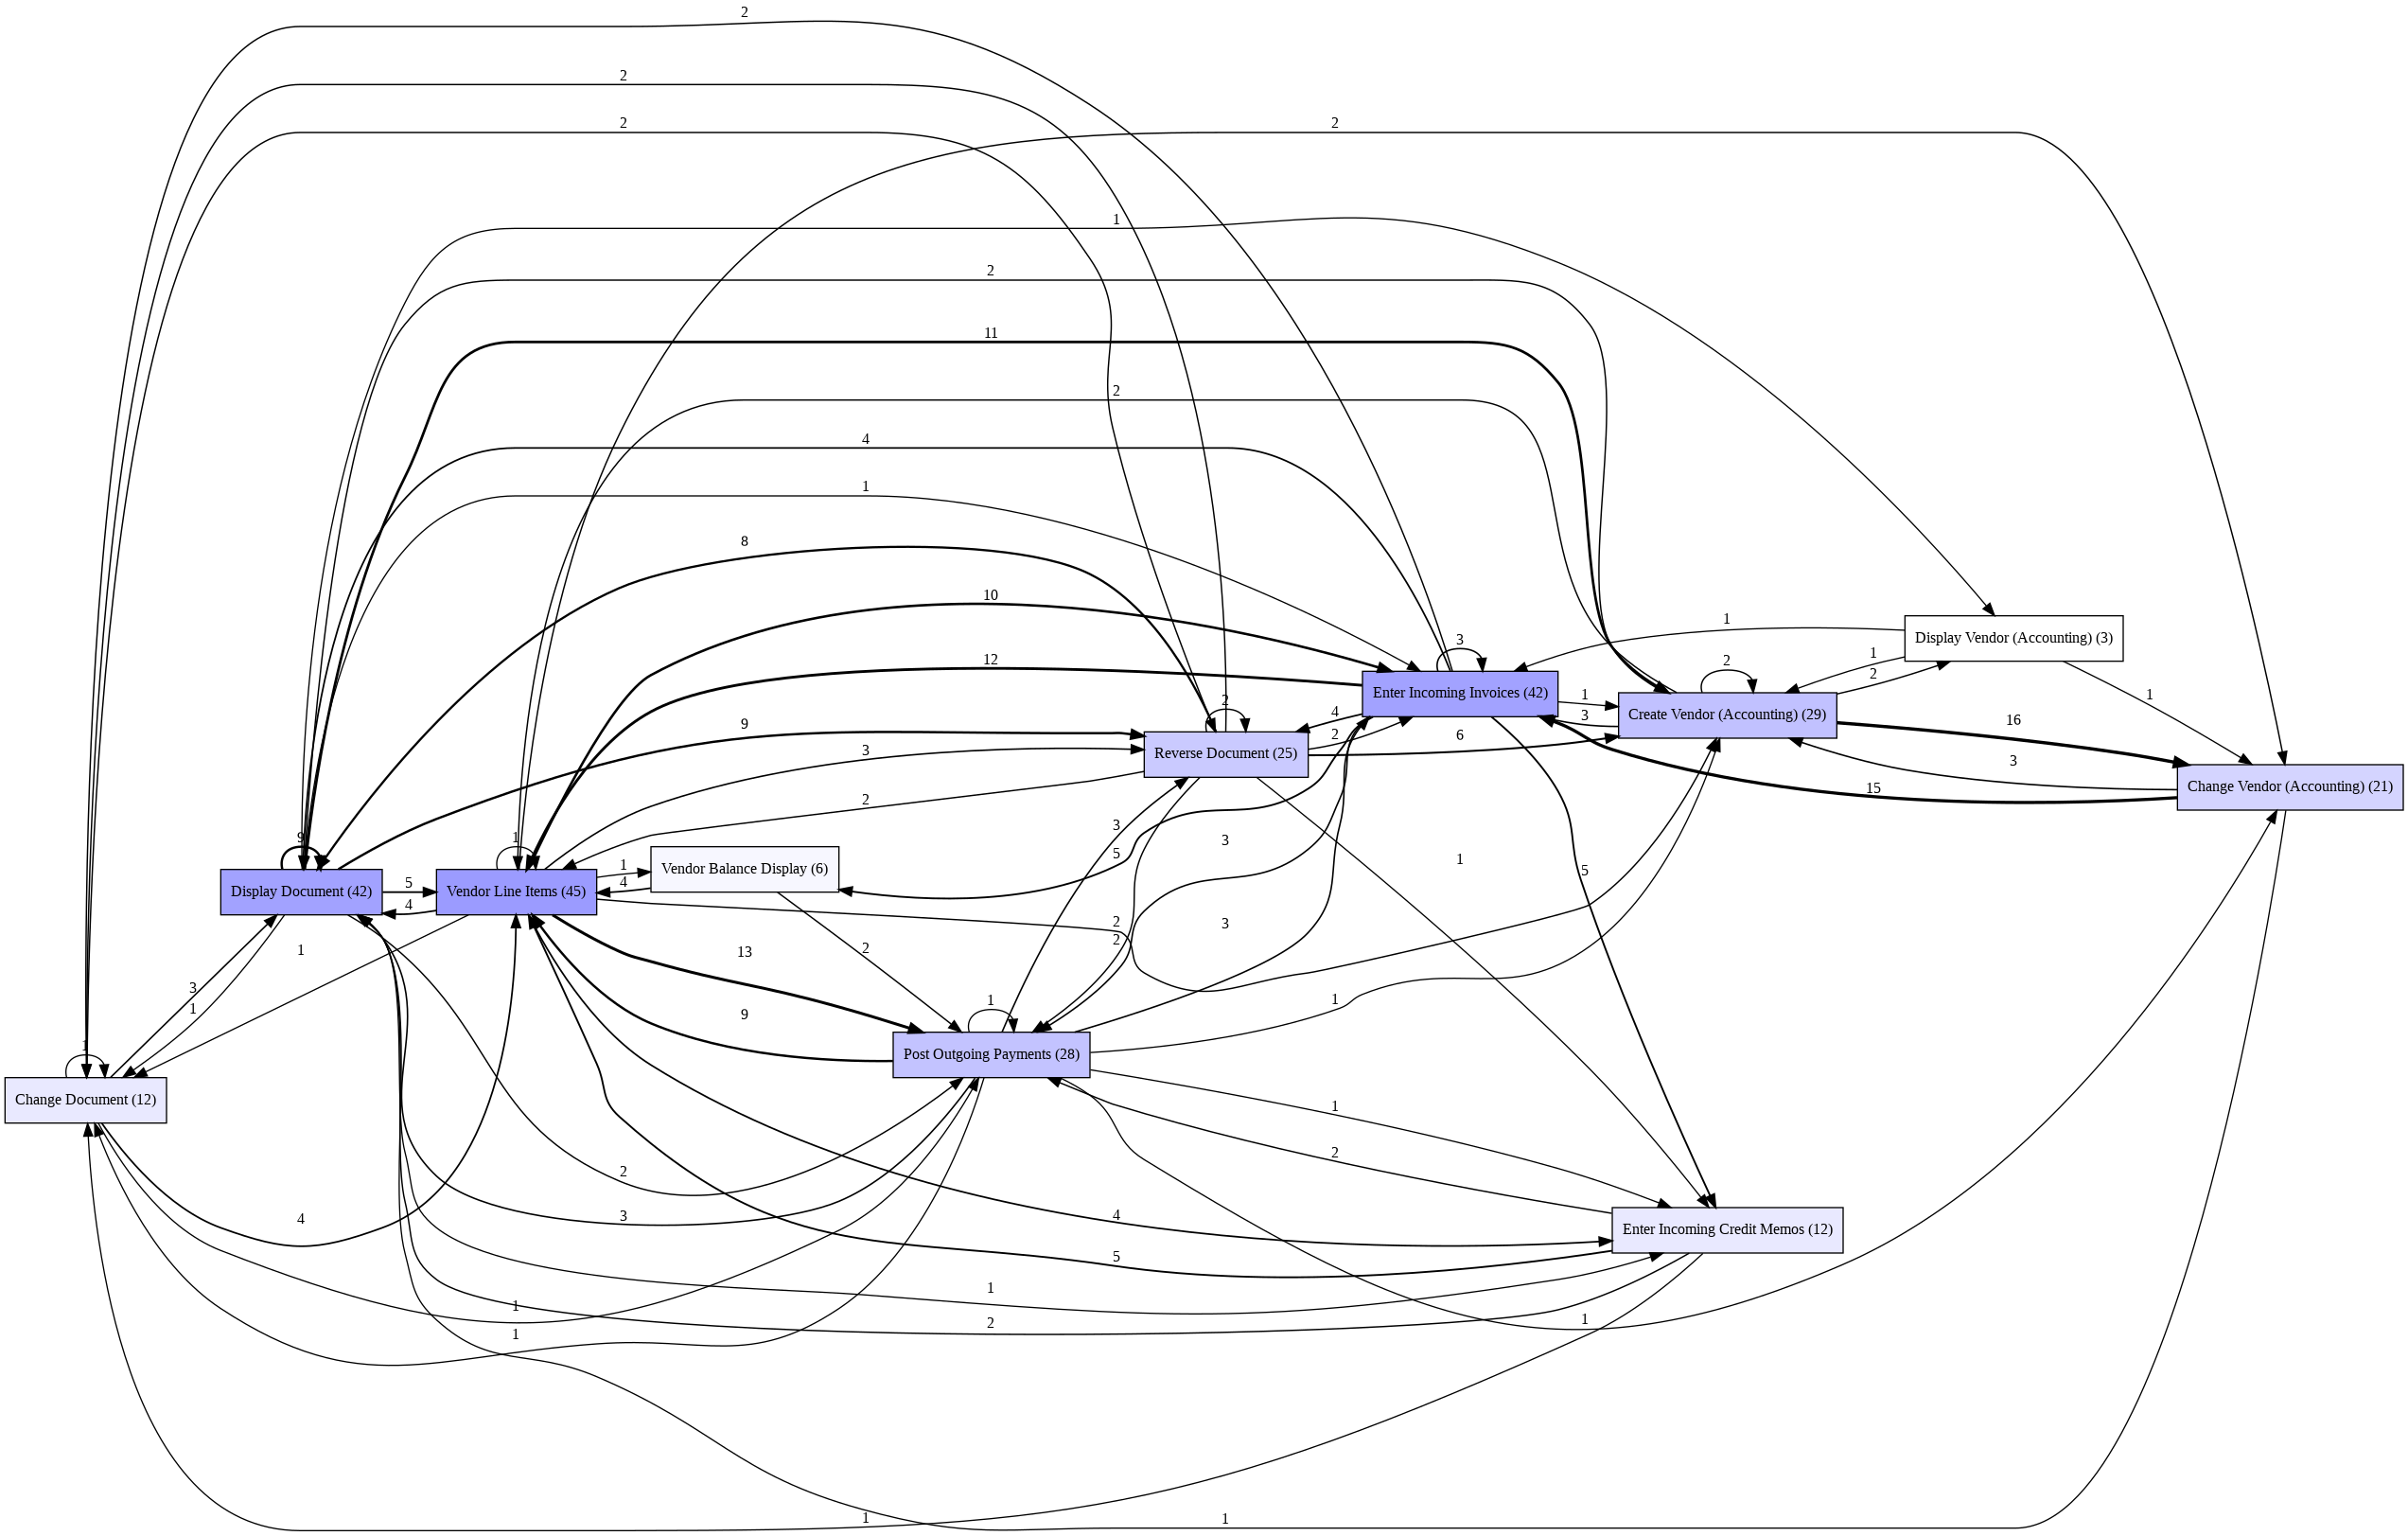

2


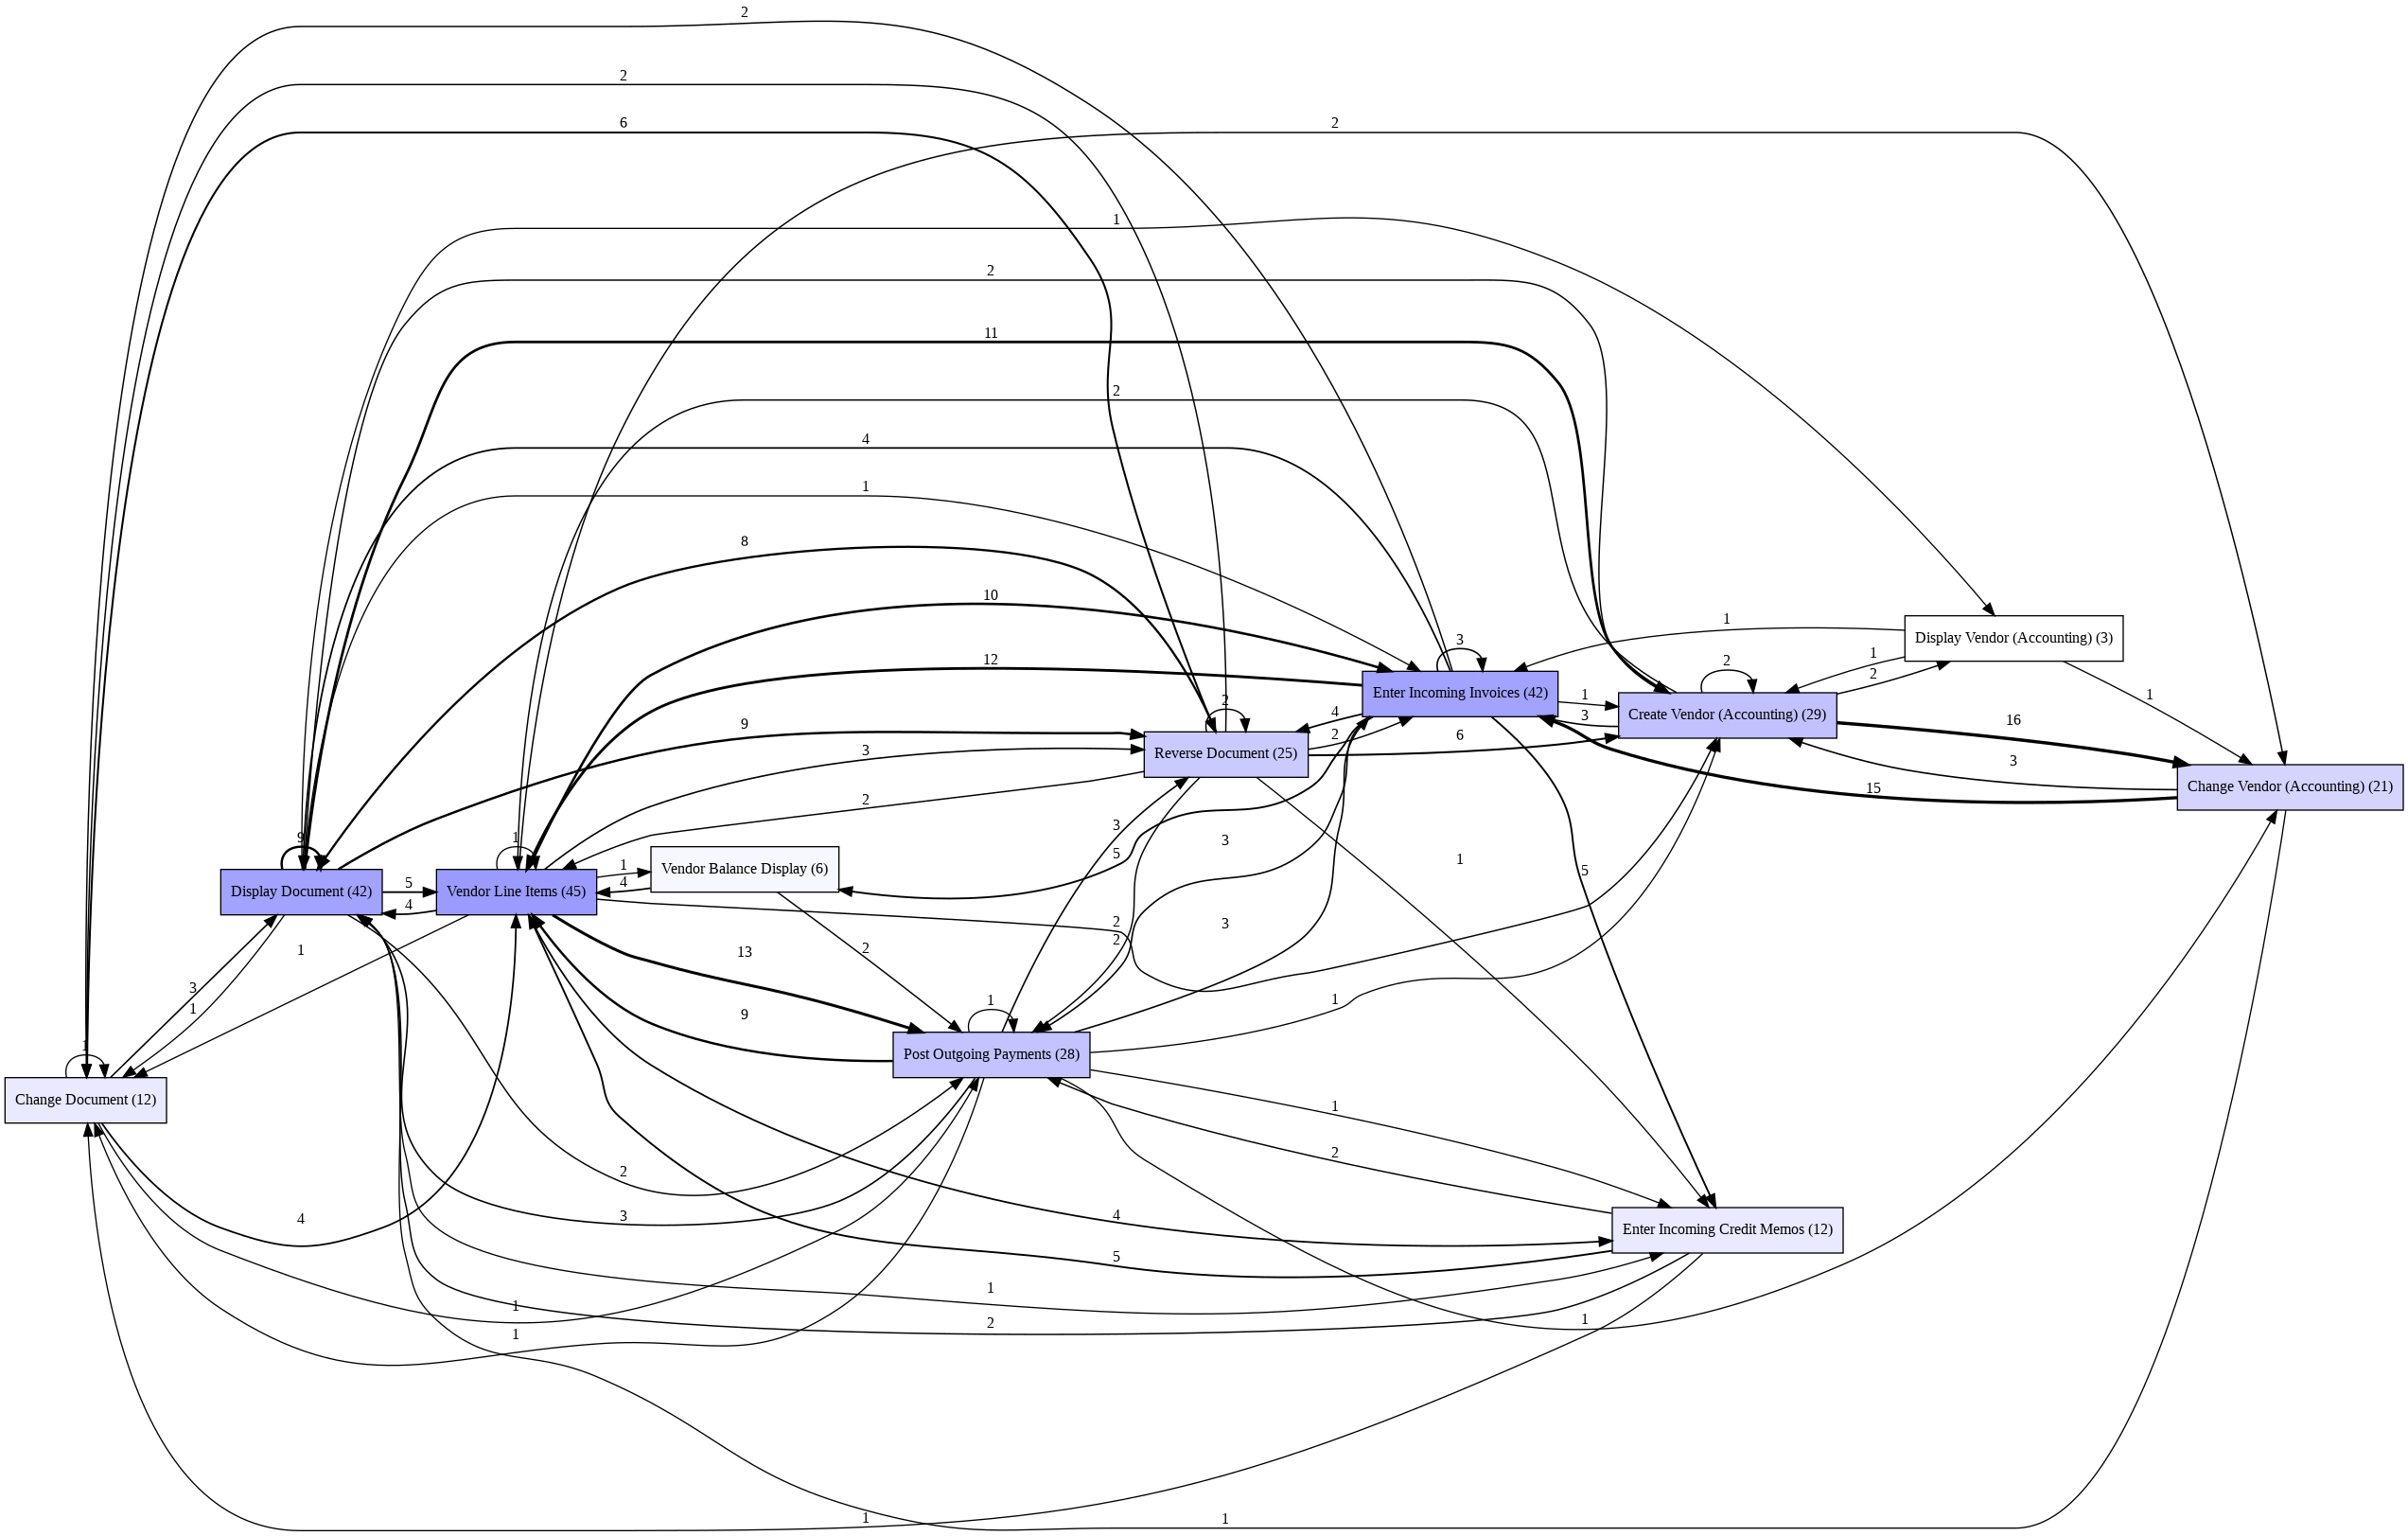

In [4]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(logcost, variant=dfg_discovery.Variants.FREQUENCY)
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfg[('Change Document', 'Reverse Document')])
dfg[('Change Document', 'Reverse Document')] =6
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)